<a href="https://colab.research.google.com/github/Thippawan72/BSC_DPDM23/blob/main/Understanding_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data

In [8]:
import pandas as pd


# Load Excel from Gdrive

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
data_from_gdrive = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23_Data/2563.xls')

In [11]:
shopping_data = pd.read_csv('/content/drive/MyDrive/BSC_DPDM23_Data/shopping.csv')

In [9]:
customer_shopping_data = pd.read_csv('/content/drive/MyDrive/BSC_DPDM23_Data/customer_shopping_data.csv')

# Load GSheets

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [ ]:
gsht = gc.open_by_key('15mUdkR5_sRScNBkXgQFtoE69E6vhnIgBDBddtvH0v4s')

In [ ]:
worksheet2 = gsht.worksheet("มิ.ย. 2563")
rows = worksheet2.get_all_values()
data_from_gsheets = pd.DataFrame.from_records(rows)

In [ ]:
data_from_gsheets.head()

,0,1,2,3,4,5,6,7,8,9,...,155,156,157,158,159,160,161,162,163,164
0,,,,,,,,,,ปริญญาตรีหรือสูงกว่า,...,,,,,,,,,,
1,,,,,,,,,,วิศวกรรมศาสตร์,...,,,,,,,,,,
2,เลขที่คำขอ,เลขที่บัตรส่งเสริม,ชื่อบริษัทภาษาไทย,สถานที่ตั้งโรงงาน,เบอร์โทรศัพท์,เบอร์โทรสาร,จังหวัด,ประเภทกิจการ,ชื่อผลิตภัณฑ์,อุตสาหการ,...,สาขาการตลาด,สาขาการจัดการ,สาขาเลขานุการ,สาขาคอมพิวเตอร์ธุรกิจ,สาขาการเงินการธนาคาร,สาขาพัฒนาชุมชน-การสหกรณ์,พาณิชยการ,สาขาอุตสาหกรรมการท่องเที่ยว,สาขาศิลปศาสตร์,อาชีวศึกษาบริหารธุรกิจ อื่นๆ
3,610707,62-0422-1-04-1-0,กรุงเทพ ไดอ์แคสซ์ติ้ง แอนด์ อินแจ๊กชั่น,"46/1,46/2 หมู่ที่ 12 ถนนบางพลี-บางนาตราด ต.บาง...",02-3373078-84,02-3373589-90,สมุทรปราการ,[6.6],Plastic Parts for Automotive,0,...,0,0,0,0,0,0,0,0,0,0
4,620660,63-0107-1-00-1-0,เจ้าพระยา คาร์บอน,ต.เขาล้าน อ.ทับสะแก ประจวบคีรีขันธ์ 77130,081-8412110,,ประจวบคีรีขันธ์,[1.15],Activated Carbon,0,...,1,1,0,0,0,0,0,0,0,0


In [ ]:
data_from_gsheets.columns = data_from_gsheets.iloc[2] # set header
data_from_gsheets = data_from_gsheets.iloc[3:].reset_index().iloc[:,1:] # skip rows
data_from_gsheets.head()


2,เลขที่คำขอ,เลขที่บัตรส่งเสริม,ชื่อบริษัทภาษาไทย,สถานที่ตั้งโรงงาน,เบอร์โทรศัพท์,เบอร์โทรสาร,จังหวัด,ประเภทกิจการ,ชื่อผลิตภัณฑ์,อุตสาหการ,...,สาขาการตลาด,สาขาการจัดการ,สาขาเลขานุการ,สาขาคอมพิวเตอร์ธุรกิจ,สาขาการเงินการธนาคาร,สาขาพัฒนาชุมชน-การสหกรณ์,พาณิชยการ,สาขาอุตสาหกรรมการท่องเที่ยว,สาขาศิลปศาสตร์,อาชีวศึกษาบริหารธุรกิจ อื่นๆ
0,610707,62-0422-1-04-1-0,กรุงเทพ ไดอ์แคสซ์ติ้ง แอนด์ อินแจ๊กชั่น,"46/1,46/2 หมู่ที่ 12 ถนนบางพลี-บางนาตราด ต.บาง...",02-3373078-84,02-3373589-90,สมุทรปราการ,[6.6],Plastic Parts for Automotive,0,...,0,0,0,0,0,0,0,0,0,0
1,620660,63-0107-1-00-1-0,เจ้าพระยา คาร์บอน,ต.เขาล้าน อ.ทับสะแก ประจวบคีรีขันธ์ 77130,081-8412110,,ประจวบคีรีขันธ์,[1.15],Activated Carbon,0,...,1,1,0,0,0,0,0,0,0,0
2,610182,63-0101-1-00-1-0,อาร์ต ออฟ เบคกิ้ง,111/21 หมู่ที่ 2 ต.ท่าจีน อ.เมือง สมุทรสาคร 74000,034-440157,,สมุทรสาคร,[1.17],Frozen Pizza Disc/Pizza Dough,1,...,0,0,0,0,0,2,3,0,0,0
3,620318,63-0080-1-00-0-0,เอ็นจีเค สปาร์คปลั๊กส์ (ประเทศไทย),700/864 หมู่ที่ 1 ต.พานทอง อ.พานทอง ชลบุรี 20160,,,ชลบุรี,[4.8.17],Temperature Sensor,0,...,0,0,0,0,0,0,0,0,0,0
4,620185,63-0079-1-00-0-0,เอ็นจีเค สปาร์คปลั๊กส์ (ประเทศไทย),700/864 หมู่ที่ 1 ต.พานทอง อ.พานทอง ชลบุรี 20160,,,ชลบุรี,[4.8.17],Oxygen Sensor,2,...,0,0,0,0,0,0,0,0,0,0


# Basic stat

In [ ]:
data_from_gsheets.describe()

2,เลขที่คำขอ,เลขที่บัตรส่งเสริม,ชื่อบริษัทภาษาไทย,สถานที่ตั้งโรงงาน,เบอร์โทรศัพท์,เบอร์โทรสาร,จังหวัด,ประเภทกิจการ,ชื่อผลิตภัณฑ์,อุตสาหการ,...,สาขาการตลาด,สาขาการจัดการ,สาขาเลขานุการ,สาขาคอมพิวเตอร์ธุรกิจ,สาขาการเงินการธนาคาร,สาขาพัฒนาชุมชน-การสหกรณ์,พาณิชยการ,สาขาอุตสาหกรรมการท่องเที่ยว,สาขาศิลปศาสตร์,อาชีวศึกษาบริหารธุรกิจ อื่นๆ
count,660,660,660,660,660,660,660,660,660,660,...,660,660,660,660,660,660,660,660,660,660
unique,660,660,558,603,388,74,55,138,392,14,...,12,14,5,11,6,3,10,8,4,12
top,610707,62-0422-1-04-1-0,โซลาร์ เอนเนอร์ยี่ โซไซตี้,98/92-94 ถนนกะตะ ต.กะรน อ.เมือง ภูเก็ต 83100,,,ชลบุรี,[7.1.1.2],Electricity Power from Solar Rooftop,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,1,21,8,223,582,111,104,86,504,...,553,544,609,587,629,658,639,644,655,641


In [6]:
shopping_data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [7]:
shopping_data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [32]:
customer_shopping_data.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [33]:
customer_shopping_data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


#### How many payment methods?

In [13]:
shopping_data.value_counts('Payment Method')

Payment Method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
dtype: int64

In [14]:
customer_shopping_data.value_counts('payment_method')

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
dtype: int64

In [15]:
shopping_data.groupby('Payment Method').count()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Frequency of Purchases
Payment Method,,,,,,,,,,,,,,,,,
Bank Transfer,612,612,612,612,612,612,612,612,612,612,612,612,612,612,612,612,612
Cash,670,670,670,670,670,670,670,670,670,670,670,670,670,670,670,670,670
Credit Card,671,671,671,671,671,671,671,671,671,671,671,671,671,671,671,671,671
Debit Card,636,636,636,636,636,636,636,636,636,636,636,636,636,636,636,636,636
PayPal,677,677,677,677,677,677,677,677,677,677,677,677,677,677,677,677,677
Venmo,634,634,634,634,634,634,634,634,634,634,634,634,634,634,634,634,634


In [16]:
shopping_data['Payment Method'].unique()

array(['Venmo', 'Cash', 'Credit Card', 'PayPal', 'Bank Transfer',
       'Debit Card'], dtype=object)

In [17]:
set(shopping_data['Payment Method'])

{'Bank Transfer', 'Cash', 'Credit Card', 'Debit Card', 'PayPal', 'Venmo'}

#### ลูกค้าที่อายุมากกว่า 40 มีเฉลี่ยการซื้อของเท่าไหร่
Average Purchase Amounth (USD) of customer age above 40 yr?

In [18]:
shopping_data[shopping_data['Age']>40].mean()

<ipython-input-18-a42cdc3ecb6a>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  shopping_data[shopping_data['Age']>40].mean()


Customer ID              1954.827942
Age                        55.384097
Purchase Amount (USD)      59.572776
Review Rating               3.731851
Previous Purchases         25.689128
dtype: float64

In [19]:
customer_shopping_data[customer_shopping_data['age']>40].mean()

<ipython-input-19-3f62d24ec708>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  customer_shopping_data[customer_shopping_data['age']>40].mean()


age          54.976743
quantity      3.003426
price       690.853136
dtype: float64

# Visualization

In [20]:
import matplotlib.pyplot as plt

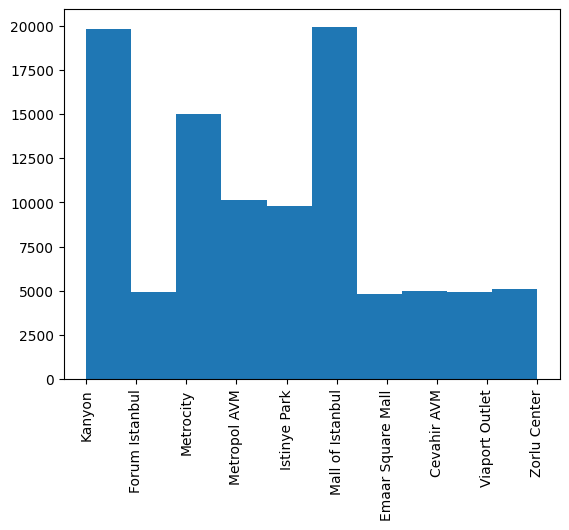

In [25]:
histoutput = plt.hist(customer_shopping_data['shopping_mall'])
tickhist = plt.xticks(rotation='vertical');

In [27]:
histoutput[0]

array([19823.,  4947., 15011., 10161.,  9781., 19943.,  4811.,  4991.,
        4914.,  5075.])

In [26]:
tickhist[-1][0].get_text()

'Kanyon'

# Distance - Similarity

#### Is there a trend in age VS price?

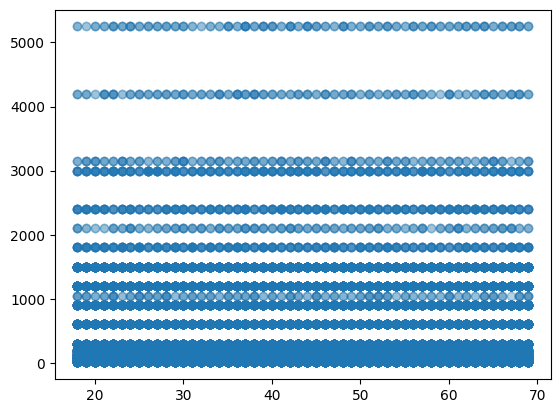

In [28]:
plt.scatter(customer_shopping_data['age'],customer_shopping_data['price'],alpha=0.05)

#### Is there a trend in age VS quantity?

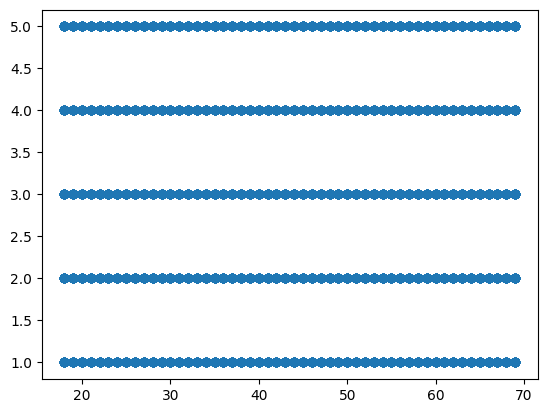

In [29]:
plt.scatter(customer_shopping_data['age'],customer_shopping_data['quantity'],alpha=0.05)

#### Is there a trend in price VS quantity?

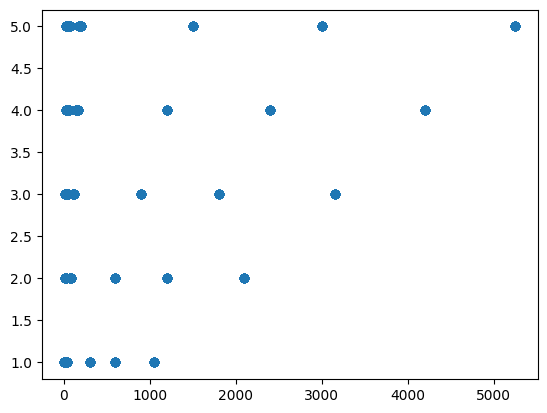

In [30]:
plt.scatter(customer_shopping_data['price'],customer_shopping_data['quantity'],alpha=0.05)

## Box Plot

#### Is there outliers in the price

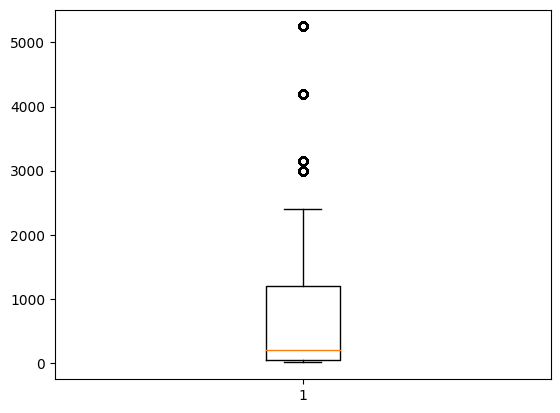

In [53]:
pbreturn = plt.boxplot(customer_shopping_data['price'])

In [50]:
pbreturn['fliers'][0].get_ydata()

array([3000.85, 3000.85, 5250.  , ..., 3150.  , 3150.  , 4200.  ])

In [59]:
len(pbreturn['fliers'][0].get_ydata())

5024

## Pie Charts

#### ration of male and female customers

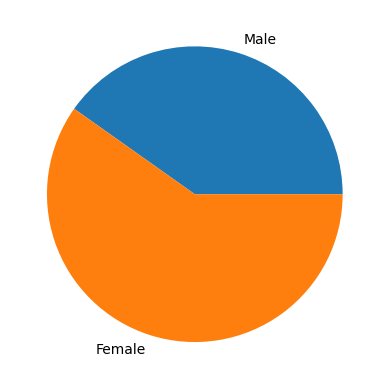

In [65]:
males = len(customer_shopping_data[customer_shopping_data['gender']=='Male'])
females = len(customer_shopping_data[customer_shopping_data['gender']=='Female'])

plt.pie([males,females],labels = ['Male','Female']);

# Bar Charts

### Stacked

#### เปรียบเทียบชนิดของสินค้าที่ซื้อในเเต่ละ Shopping mall เเบบภาพรวม

In [66]:
set(customer_shopping_data['category'])

{'Books',
 'Clothing',
 'Cosmetics',
 'Food & Beverage',
 'Shoes',
 'Souvenir',
 'Technology',
 'Toys'}

In [81]:
set(customer_shopping_data['shopping_mall'])

{'Cevahir AVM',
 'Emaar Square Mall',
 'Forum Istanbul',
 'Istinye Park',
 'Kanyon',
 'Mall of Istanbul',
 'Metrocity',
 'Metropol AVM',
 'Viaport Outlet',
 'Zorlu Center'}

In [82]:
customer_shopping_data.groupby(['shopping_mall','category'])['quantity'].count()

shopping_mall  category       
Cevahir AVM    Books               258
               Clothing           1729
               Cosmetics           732
               Food & Beverage     772
               Shoes               490
                                  ... 
Zorlu Center   Food & Beverage     750
               Shoes               519
               Souvenir            257
               Technology          250
               Toys                513
Name: quantity, Length: 80, dtype: int64

In [69]:
customer_shopping_data.groupby(['shopping_mall','category'])['quantity'].count()

shopping_mall  category       
Cevahir AVM    Books               258
               Clothing           1729
               Cosmetics           732
               Food & Beverage     772
               Shoes               490
                                  ... 
Zorlu Center   Food & Beverage     750
               Shoes               519
               Souvenir            257
               Technology          250
               Toys                513
Name: quantity, Length: 80, dtype: int64

In [72]:
customer_shopping_data.groupby(['shopping_mall','category'])['quantity'].count().unstack()

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
shopping_mall,,,,,,,,
Cevahir AVM,258,1729,732,772,490,240,256,514
Emaar Square Mall,236,1651,760,692,498,247,263,464
Forum Istanbul,252,1729,770,712,458,261,234,531
Istinye Park,462,3353,1458,1490,1001,515,487,1015
Kanyon,1013,6840,3023,2909,2017,1037,997,1987
Mall of Istanbul,1025,6923,3050,2957,2023,948,1017,2000
Metrocity,752,5268,2265,2244,1457,738,772,1515
Metropol AVM,476,3525,1541,1517,1074,531,464,1033
Viaport Outlet,246,1708,734,733,497,225,256,515


In [83]:
customer_shopping_data.groupby(['shopping_mall','category'])['quantity'].sum()

shopping_mall  category       
Cevahir AVM    Books               792
               Clothing           5180
               Cosmetics          2174
               Food & Beverage    2293
               Shoes              1473
                                  ... 
Zorlu Center   Food & Beverage    2216
               Shoes              1589
               Souvenir            716
               Technology          765
               Toys               1526
Name: quantity, Length: 80, dtype: int64

In [84]:
customer_shopping_data.groupby(['shopping_mall','category'])['quantity'].sum().unstack()

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
shopping_mall,,,,,,,,
Cevahir AVM,792,5180,2174,2293,1473,708,780,1549
Emaar Square Mall,730,5038,2272,2109,1452,726,795,1379
Forum Istanbul,756,5239,2342,2072,1459,775,673,1536
Istinye Park,1368,10165,4396,4478,3010,1566,1438,3044
Kanyon,2969,20513,9155,8695,6065,3025,3050,5985
Mall of Istanbul,3099,20813,9193,8878,6112,2921,3067,6031
Metrocity,2271,15729,6700,6764,4349,2197,2273,4611
Metropol AVM,1468,10552,4569,4586,3237,1586,1396,3136
Viaport Outlet,720,5101,2279,2186,1471,651,784,1524


In [73]:
bardata = customer_shopping_data.groupby(['shopping_mall','category'])['quantity'].count().unstack()

In [74]:
bardata ['Books']

shopping_mall
Cevahir AVM           258
Emaar Square Mall     236
Forum Istanbul        252
Istinye Park          462
Kanyon               1013
Mall of Istanbul     1025
Metrocity             752
Metropol AVM          476
Viaport Outlet        246
Zorlu Center          261
Name: Books, dtype: int64

In [85]:
bardata.reset_index()['shopping_mall']

0          Cevahir AVM
1    Emaar Square Mall
2       Forum Istanbul
3         Istinye Park
4               Kanyon
5     Mall of Istanbul
6            Metrocity
7         Metropol AVM
8       Viaport Outlet
9         Zorlu Center
Name: shopping_mall, dtype: object

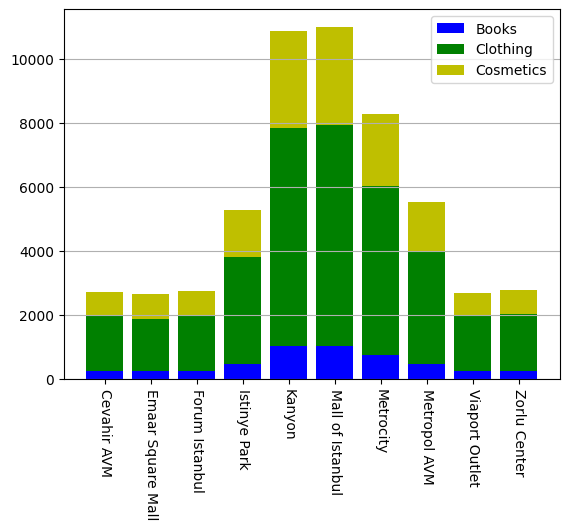

In [75]:
plt.bar([1,2,3,4,5,6,7,8,9,10],bardata['Books'],color='b' ,label='Books')
plt.bar([1,2,3,4,5,6,7,8,9,10],bardata['Clothing'],bottom=bardata['Books'],color='g' ,label='Clothing')
plt.bar([1,2,3,4,5,6,7,8,9,10],bardata['Cosmetics'],bottom=bardata['Books']+bardata['Clothing'],color='y' ,label='Cosmetics')
plt.xticks([1,2,3,4,5,6,7,8,9,10], bardata.reset_index()['shopping_mall'],rotation=270)
plt.grid(True,axis='y')
plt.legend();

### Grouped

#### เปรียบเทียบปริมาณชนิดสินค้าที่ซื้อในแต่ละ shopping mall เป็นราย shopping mall (Books - Souvenir - Technology)

1 bar

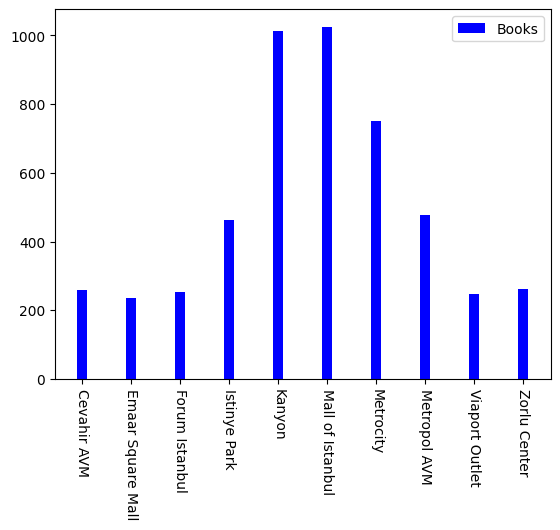

In [86]:
width = 0.2

plt.bar([1,2,3,4,5,6,7,8,9,10],bardata['Books'],width,color='b',label='Books')

plt.xticks([1,2,3,4,5,6,7,8,9,10], bardata.reset_index()['shopping_mall'],rotation=270)
plt.legend();

**2** bars

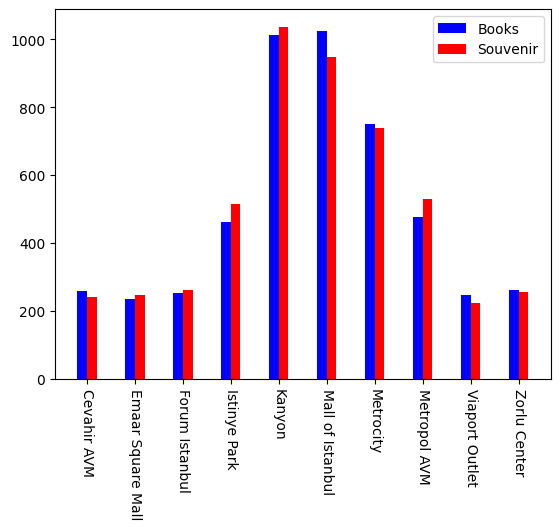

In [87]:
width = 0.2

plt.bar([1-width/2,2-width/2,3-width/2,4-width/2,5-width/2,6-width/2,7-width/2,8-width/2,9-width/2,10-width/2]
        ,bardata['Books'],width,color='b',label='Books')
plt.bar([1+width/2,2+width/2,3+width/2,4+width/2,5+width/2,6+width/2,7+width/2,8+width/2,9+width/2,10+width/2]
        ,bardata['Souvenir'],width,color='r',label='Souvenir')
plt.xticks([1,2,3,4,5,6,7,8,9,10], bardata.reset_index()['shopping_mall'],rotation=270)
plt.legend();

3 bar

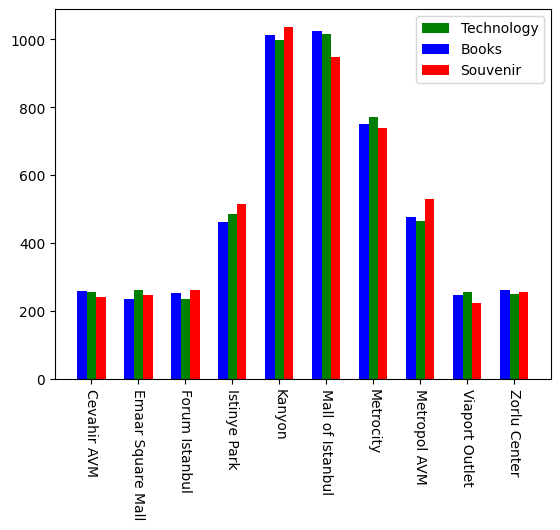

In [88]:
width = 0.2
plt.bar([1,2,3,4,5,6,7,8,9,10]
        ,bardata['Technology'],width,color='g',label='Technology')
plt.bar([1-width,2-width,3-width,4-width,5-width,6-width,7-width,8-width,9-width,10-width]
        ,bardata['Books'],width,color='b',label='Books')
plt.bar([1+width,2+width,3+width,4+width,5+width,6+width,7+width,8+width,9+width,10+width]
        ,bardata['Souvenir'],width,color='r',label='Souvenir')
plt.xticks([1,2,3,4,5,6,7,8,9,10], bardata.reset_index()['shopping_mall'],rotation=270)
plt.legend();

## Distance - Similarity

In [94]:
from scipy.spatial import distance_matrix

In [76]:
from numpy import linalg as LA

In [89]:
import numpy as np

In [90]:
data_points = np.array([[1,2],[-1,4],[0,-3],[-3,-2]])

In [91]:
data_points

array([[ 1,  2],
       [-1,  4],
       [ 0, -3],
       [-3, -2]])

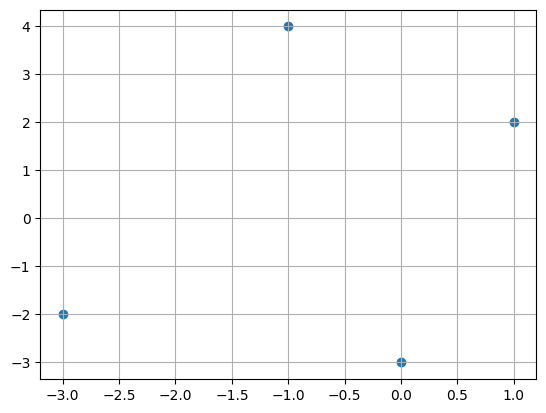

In [92]:
plt.scatter(data_points[:,0],data_points[:,1])
plt.grid(True)

In [95]:
distance_matrix(data_points,data_points) # default p=2 Euclidean distance

array([[0.        , 2.82842712, 5.09901951, 5.65685425],
       [2.82842712, 0.        , 7.07106781, 6.32455532],
       [5.09901951, 7.07106781, 0.        , 3.16227766],
       [5.65685425, 6.32455532, 3.16227766, 0.        ]])

In [96]:
distance_matrix(data_points,data_points,p=1) # p=1 City block distance

array([[0., 4., 6., 8.],
       [4., 0., 8., 8.],
       [6., 8., 0., 4.],
       [8., 8., 4., 0.]])

# z-score

### normalization